---

# Regressão

#### Os modelos de regressão tem como proposta responder questões de valores lineares. Por exemplo: "Dado o histórico de preços de imóveis e o número de seus quartos, quanto custaria um imóvel com 4 quartos?"

#### O termo "linearidade" na álgebra refere-se a uma relação linear entre duas ou mais variáveis. Se desenharmos essa relação em um espaço bidimensional (entre duas variáveis, nesse caso), obteremos uma linha reta.

![pandas](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

## Equação da Reta

### y = βx + a  

Onde β é o intercepto e a é o declive da linha. Então, basicamente, o algoritmo de regressão linear nos dá o valor mais ideal para o intercepto e a inclinação (em duas dimensões). As variáveis y e x permanecem as mesmas, pois são os recursos de dados e não podem ser alterados. Os valores que podemos controlar são a interceptação e a inclinação. Pode haver várias linhas retas, dependendo dos valores de interceptação e inclinação. Basicamente, o que o algoritmo de regressão linear faz é ajustar várias linhas nos pontos de dados e retorna a linha que resulta no menor erro.

![pandas](https://image.slidesharecdn.com/8-1209490505240696-9/95/multiple-linear-regression-16-638.jpg?cb=1489720634)

#### - O intecepto é o valor de Y quando X = 0, ou seja, o valor de Y quando a reta toca no eixo Y.
#### - O declive (ou coeficiente de angulação) descrito como β, determina a "velocidade" do aumento ou diminuição do valor predito para cada X.

![pandas](https://image.slidesharecdn.com/simplelinearregressionpelatihan-090829234643-phpapp02/95/simple-linier-regression-9-728.jpg?cb=1251589640)

### E se tivermos vários eixos X (múltiplas features)?

#### Y = β0 + β1X1 + β2X2 + … + βnXn

Esse mesmo conceito pode ser estendido para os casos em que há mais de duas variáveis. Isso é chamado de **regressão linear múltipla**. Por exemplo, considere um cenário em que você tem que prever o preço da casa com base em sua área, número de quartos, renda média das pessoas na área, a idade da casa e assim por diante. Neste caso, a variável dependente depende de várias variáveis independentes.

----

# Vamos aplicar uma regressão linear com os dados que estudamos ontem

In [1]:
import pandas

pl_df = pandas.read_csv("premier_league.csv")
pl_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Para gerar um modelo precisamos separar as colunas em features (X) e target (y)

In [2]:
features = ["fpl_value"]
X = pl_df[features]
y = pl_df["market_value"]

### Para análise da performance de um modelo em aprendizagem supervisionada nós devemos separar os dados em treino e teste.

- Treino, é aquele que será usado para gerar o nosso modelo
- Teste, nesse é que vamos validar se a nossa previsão foi correta

In [3]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

## Se a gente olhar um gráfico 2D com apenas uma feature

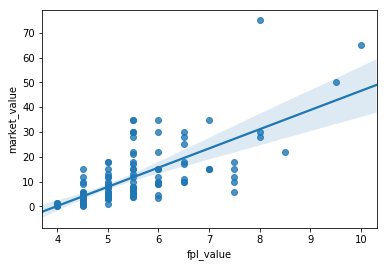

In [4]:
%matplotlib inline
import seaborn as sns

data = pandas.concat([xtest, ytest], axis=1)

sns.regplot("fpl_value", "market_value", data=data)

## Vamos gerar o nosso modelo

### Primeiro definimos qual modelo iremos usar

In [5]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

### Vamos gerar o modelo treinando ele

In [6]:
regressor.fit(xtrain, ytrain)

/Users/renan/.virtualenvs/basico/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Vamos aplicar esse modelo gerado aos dados que separamos para validar

In [7]:
pred = regressor.predict(xtest)

### Um modelo de regressão retorna um coeficiente de inclinação para cada feature

In [8]:
for idx, col_name in enumerate(xtrain.columns):
    print("Coeficiente da feature {} é {}".format(col_name, regressor.coef_[idx]))

Coeficiente da feature fpl_value é 7.04097463459396


In [9]:
regressor.intercept_

-27.484407625539585

## Com essas informações podemos construir a equação da reta

### Y = −25.23 + 5.83 ×X1 - 0.60 × X2 + 5.72 × X3 + 1.64 × X4 + 0.00 × X5

## Vamos analisar a performance usando o R2 

#### R2=1–(RSS/TSS)
- O RSS (soma residual dos quadrados) mede a variabilidade deixada inexplicada após a execução da regressão
- O TSS mede a variância total em Y
- Portanto, a estatística R2 mede a proporção de variabilidade em Y que é explicada por X usado nosso modelo

In [10]:
regressor.score(xtest, ytest)

0.5087984600507327

#### Também podemos obter o erro quadrático médio usando o método mean_squared_error do scikit-learn e comparar a previsão para o conjunto de dados de teste (dados não usados para treinamento) com a verdade básica do conjunto de testes de dados:

In [11]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred, ytest)
mse

69.938667686336657

In [12]:
mse**0.5

8.3629341553271033

### Nós conseguimos simular uma predição

In [13]:
regressor.predict([[12.0]])

array([ 57.00728799])

## <font color='blue'>DESAFIO: Otimize o modelo, aumente o score!</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [14]:
features = ["big_club", "fpl_value", "position_cat", "page_views"]
X = pl_df[features]
y = pl_df["market_value"]

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
m_regressor = LinearRegression()
m_regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
m_pred = m_regressor.predict(xtest)

In [18]:
for idx, col_name in enumerate(xtrain.columns):
    print("Coeficiente da feature {} é {}".format(col_name, m_regressor.coef_[idx]))

Coeficiente da feature big_club é 6.0635163872212745
Coeficiente da feature fpl_value é 5.711692369246773
Coeficiente da feature position_cat é 1.4905728324523047
Coeficiente da feature page_views é 0.0018817331514233938


In [19]:
m_regressor.score(xtest, ytest)

0.69670909254098945

In [20]:
mean_squared_error(m_pred, ytest)

43.183419154699784

In [1]:
43.183419154699784 ** 0.5

6.571409221369476

In [21]:
# "big_club", "fpl_value", "position_cat", "page_views"

m_regressor.predict([[1, 12.0, 1, 4329]])

array([ 57.47081359])